In [1]:
import sys
sys.path.append('../../..')

# ChaskiNode: Distributed Node Communication and Management

The `ChaskiNode` class is designed to manage network communication between distributed nodes.
This class handles various network operations such as initiating connections, handling incoming requests,
and orchestrating network-wide actions like discovery and pairing of nodes based on shared subscriptions.

**Key Features:**
- **TCP and UDP Communication**: Supports both TCP and UDP protocols for reliable and timely message delivery.
- **Node Discovery and Pairing**: Handles discovery of other nodes and establishes connections based on subscriptions.
- **Ping and Latency Management**: Supports ping operations for measuring latency and maintaining connection health.
- **Subscription Management**: Manages subscribed topics and pairs nodes sharing common interests.
- **Keep-alive and Disconnection Handling**: Maintains active connections and handles disconnections gracefully.



## Create node

To create a `ChaskiNode`, you need to instantiate it with the appropriate parameters. Here’s an example to guide you:

In [2]:
from chaski.node import ChaskiNode

# Initialize the ChaskiNode with required parameters
node = ChaskiNode(
    host='127.0.0.1',        # The IP address or hostname to bind the node
    port=12345,             # The port number to bind the node
    name='Node1',           # Optional: The name of the node for identification
    subscriptions=['topic1', 'topic2'],  # Topics that the node is interested in
    run=True                # Determine if the TCP/UDP servers should start immediately
)

Node1: Connection closed while reading from ('127.0.0.1', 48470).
Node1: An exception occurred: 
Traceback (most recent call last):
  File "/home/yeison/Development/PythonDev/DunderLab/python-chaski/docs/source/notebooks/../../../chaski/node.py", line 714, in _reader_loop
    length_data = await edge.reader.readexactly(4)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/asyncio/streams.py", line 750, in readexactly
    raise exceptions.IncompleteReadError(incomplete, n)
asyncio.exceptions.IncompleteReadError: 0 bytes read on a total of 4 expected bytes

Node1: Closing connection with Node2: N( 0,  0) 127.0.0.1: 12346
Node1: An exception occurred: 
NoneType: None



### Parameters:
- **host**: The hostname or IP address to listen on or bind to.
- **port**: The port number to listen on or bind to.
- **name**: Optional. The name of the node, used for identification and logging.
- **subscriptions**: Optional. A list of subscription topics this node is interested in.
- **run**: Optional. A flag to start the servers immediately upon initialization.

The `ChaskiNode` will handle the network communication, manage the connections, and take care of aspects like node discovery, pairing, and ping operations for latency measurement.

## Set connections between nodes

To establish connections between nodes, you can use the `connect_to_peer` method of the `ChaskiNode` class. This method allows a node to initiate a TCP connection to a specified peer node. Here’s an example:

In [3]:
from chaski.node import ChaskiNode

# Initialize the first ChaskiNode with required parameters
node1 = ChaskiNode(
    host='127.0.0.1',        # The IP address or hostname to bind the node
    port=12345,             # The port number to bind the node
    name='Node1',           # The name of the node for identification
    subscriptions=['A', 'B'],  # Topics that the node is interested in
    run=True,               # Start the TCP/UDP servers immediately
    root=True
)

# Initialize the second ChaskiNode with required parameters
node2 = ChaskiNode(
    host='127.0.0.1',        # The IP address or hostname to bind the node
    port=12346,             # The port number to bind the node
    name='Node2',           # The name of the node for identification
    subscriptions=['B', 'C'],  # Topics that the node is interested in
    run=True                # Start the TCP/UDP servers immediately
)

# Initialize the second ChaskiNode with required parameters
node3 = ChaskiNode(
    host='127.0.0.1',        # The IP address or hostname to bind the node
    port=12347,             # The port number to bind the node
    name='Node3',           # The name of the node for identification
    subscriptions=['C', 'D'],  # Topics that the node is interested in
    run=True                # Start the TCP/UDP servers immediately
)

# Connect node1 to node2
await node2.connect_to_peer(node1)
await node3.connect_to_peer(node1)

This method allows `node1` to establish a connection to `node2` by specifying the host and port of `node2`.

In [4]:
for node in [node1, node2, node3]:
    print(node.name, node.subscriptions, node.get_status()['paired'], len(node.edges))

Node1 {'B', 'A'} {'B': True, 'A': True} 0
Node2 {'B', 'C'} {'B': False, 'C': False} 0
Node3 {'C', 'D'} {'C': False, 'D': False} 0


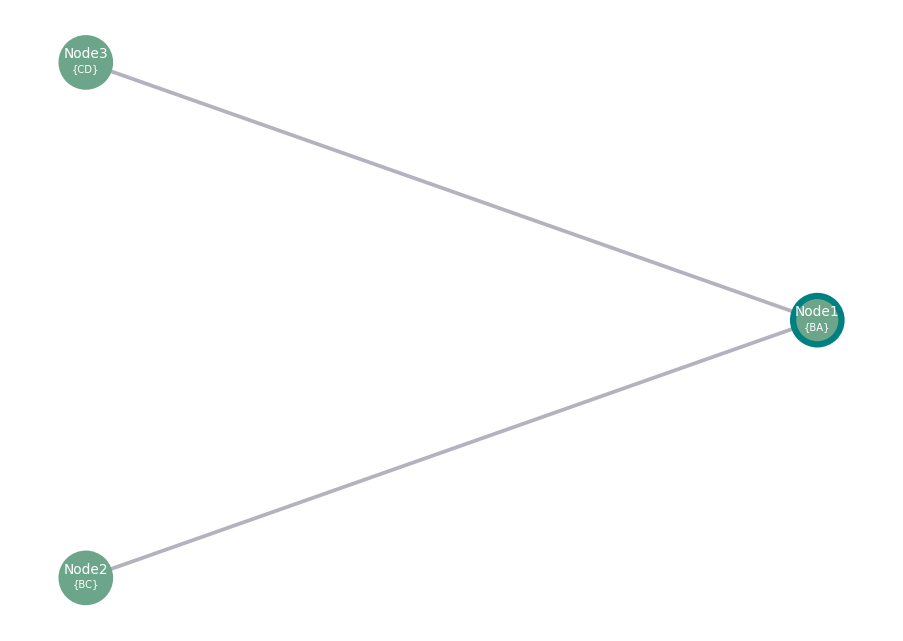

In [6]:
from chaski.utils.viz import display_graph

display_graph([node1, node2, node3])

## About discovery feature

To utilize the discovery feature in `ChaskiNode`, you can call the `discovery` method. This method will enable a node to discover other nodes with matching subscriptions within the network and pair with them if they are not already paired. Below is an example:

```python
from chaski.node import ChaskiNode

# Initialize a new ChaskiNode
node = ChaskiNode(
    host='127.0.0.1',        # The IP address or hostname to bind the node
    port=12345,             # The port number to bind the node
    name='Node1',           # Optional: The name of the node for identification
    subscriptions=['topic1', 'topic2'],  # Topics that the node is interested in
    run=True                # Start the TCP/UDP servers immediately
)

# Perform the discovery process
await node.discovery()

```

### Parameters:
- **node**: Optional. A reference to a ChaskiNode instance to start the discovery process from. If set to `None`, the discovery will be performed using the node itself.
- **on_pair**: Optional. A flag determining the action to be taken when a peer is discovered. Can be 'none' (no action) or 'disconnect' (disconnect after pairing). Defaults to 'none'.
- **timeout**: Optional. The maximum time in seconds to wait for the discovery process to complete before considering the node as paired. Defaults to 10 seconds.

The `discovery` method will initiate a network-wide discovery process, connecting nodes with matching subscriptions and marking them as paired.